In [2]:
import numpy as np, random
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
set_seed(810109203)

In [3]:
from keras.datasets import mnist
(_, _) , (test_images, _) = mnist.load_data()
test_images = test_images.reshape(test_images.shape[0] , -1)
test_images = test_images.astype('float32') / 255.0

2024-01-15 12:40:37.323625: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-15 12:40:39.811490: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 12:40:39.811578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 12:40:40.214791: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 12:40:41.015003: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-15 12:40:41.017005: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
import tensorflow as tf
autoencoder = tf.keras.models.load_model('mnist_AE.h5')
reconstructed_images = autoencoder.predict(test_images)

2024-01-15 12:40:50.466240: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step


2024-01-15 12:40:51.740865: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


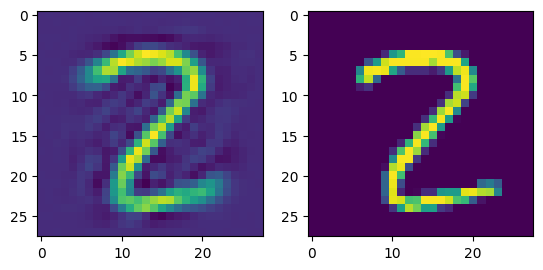

In [19]:
import matplotlib.pyplot as plt
rand = np.random.randint(0, len(reconstructed_images))
random_case = reconstructed_images[rand]
random_case2 = test_images[rand]
img_m = np.reshape(random_case, (28,28))
img_m2 = np.reshape(random_case2, (28,28))

plt.subplot(1, 2, 1)  
plt.imshow(img_m)

plt.subplot(1, 2, 2)
plt.imshow(img_m2)

plt.show()

### MSE

In [6]:
mse = [0] * len(test_images)
for i in range(len(test_images)):
    for j in range(len(test_images[i])):
        mse[i] += (test_images[i][j] - reconstructed_images[i][j]) ** 2

In [7]:
for i in range(len(mse)):
    mse[i] /= len(test_images[i])

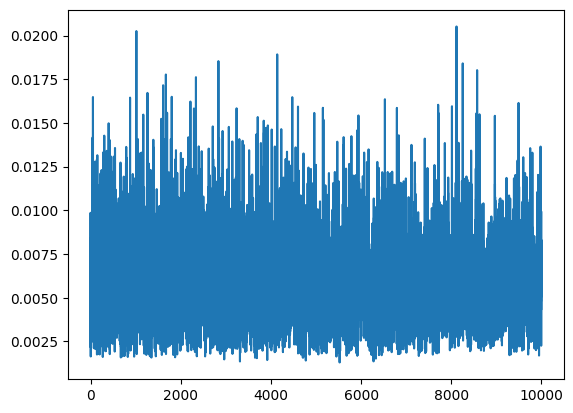

In [8]:
_ = plt.plot(mse)

### mean and var

In [9]:
import statistics as st

In [10]:
m_v_mse = (st.mean(mse), st.variance(mse))

In [11]:
m_v_mse

(0.0058750389979277595, 5.439702984147404e-06)

In [12]:
from scipy import stats
ks_statistic, p_value = stats.kstest(mse, cdf='norm', args=(m_v_mse[0], m_v_mse[1]))

In [13]:
ks_statistic, p_value = stats.kstest(mse, stats.norm.cdf)

In [14]:
p_value

0.0